In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Upload file manually or use Kaggle API
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()


Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


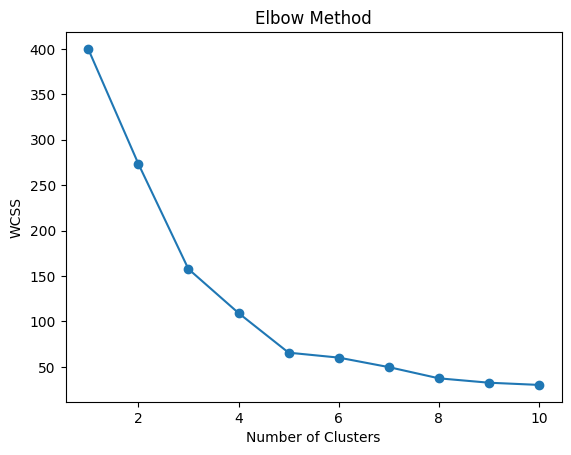

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


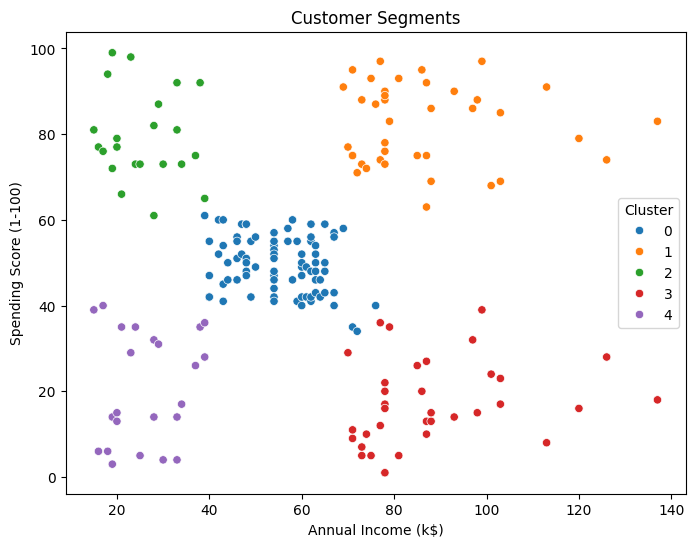

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)
plt.title("Customer Segments")
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)



Silhouette Score: 0.5546571631111091


In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


In [11]:
def predict_customer_cluster(annual_income, spending_score):
    # Convert input to array
    new_data = np.array([[annual_income, spending_score]])

    # Scale input using the same scaler
    new_data_scaled = scaler.transform(new_data)

    # Predict cluster
    cluster = kmeans.predict(new_data_scaled)

    return cluster[0]


In [12]:
customer_cluster = predict_customer_cluster(70, 80)  # Example: income=70k, score=80
print("This customer belongs to Cluster:", customer_cluster)


This customer belongs to Cluster: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


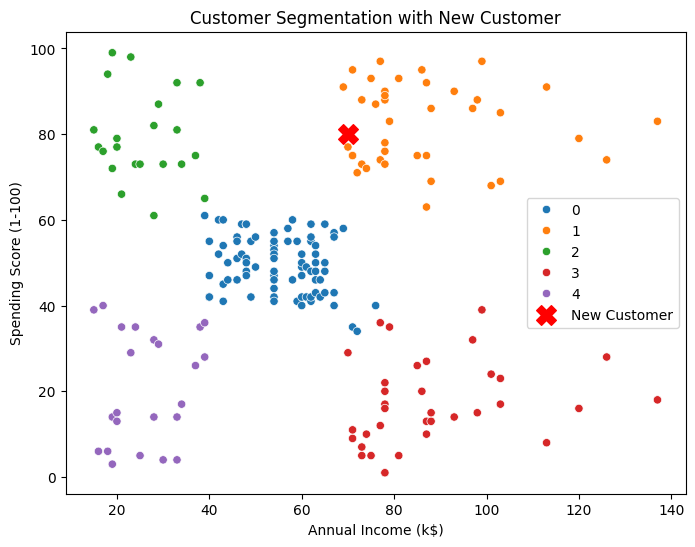

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)

# Plot the new customer
plt.scatter(70, 80, color='red', s=200, marker='X', label='New Customer')
plt.legend()
plt.title("Customer Segmentation with New Customer")
plt.show()


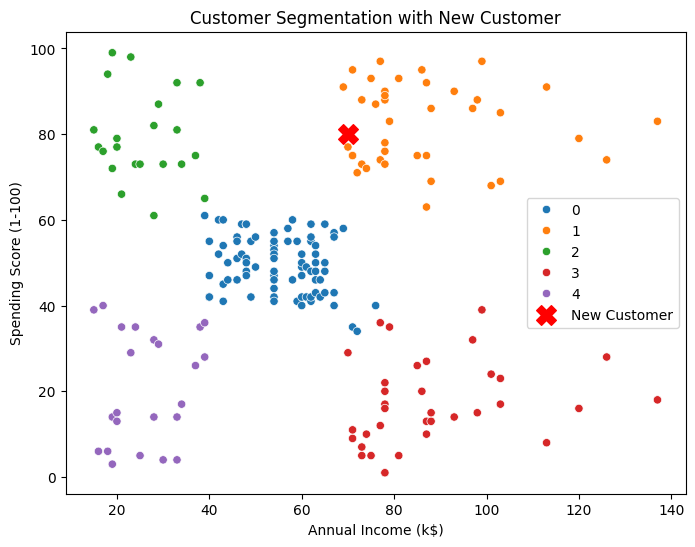

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10'
)

# Plot the new customer
plt.scatter(70, 80, color='red', s=200, marker='X', label='New Customer')
plt.legend()
plt.title("Customer Segmentation with New Customer")
plt.show()


In [15]:
def predict_customer_cluster(annual_income, spending_score):
    # Prepare input
    new_data = np.array([[annual_income, spending_score]])

    # Scale input
    new_data_scaled = scaler.transform(new_data)

    # Predict cluster
    cluster = kmeans.predict(new_data_scaled)
    return cluster[0]


In [16]:
# Example customer: Income = 75k, Spending Score = 40
customer_cluster = predict_customer_cluster(75, 40)
print("This customer belongs to Cluster:", customer_cluster)


This customer belongs to Cluster: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
